In [19]:
#libraries used in below code

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
df=pd.read_csv("Unemployment in India.csv")
df.head()


,Region,Date,Frequency,Estimated Unemployment Rate (%),Estimated Employed,Estimated Labour Participation Rate (%),Area
0,Andhra Pradesh,31-05-2019,Monthly,3.65,11999139.0,43.24,Rural
1,Andhra Pradesh,30-06-2019,Monthly,3.05,11755881.0,42.05,Rural
2,Andhra Pradesh,31-07-2019,Monthly,3.75,12086707.0,43.50,Rural
3,Andhra Pradesh,31-08-2019,Monthly,3.32,12285693.0,43.97,Rural
4,Andhra Pradesh,30-09-2019,Monthly,5.17,12256762.0,44.68,Rural


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 7 columns):
 #   Column                                    Non-Null Count  Dtype  
---  ------                                    --------------  -----  
 0   Region                                    740 non-null    object 
 1    Date                                     740 non-null    object 
 2    Frequency                                740 non-null    object 
 3    Estimated Unemployment Rate (%)          740 non-null    float64
 4    Estimated Employed                       740 non-null    float64
 5    Estimated Labour Participation Rate (%)  740 non-null    float64
 6   Area                                      740 non-null    object 
dtypes: float64(3), object(4)
memory usage: 42.1+ KB


In [4]:
df.describe()

,Estimated Unemployment Rate (%),Estimated Employed,Estimated Labour Participation Rate (%)
count,740.000000,7.400000e+02,740.000000
mean,11.787946,7.204460e+06,42.630122
std,10.721298,8.087988e+06,8.111094
min,0.000000,4.942000e+04,13.330000
25%,4.657500,1.190404e+06,38.062500
50%,8.350000,4.744178e+06,41.160000
75%,15.887500,1.127549e+07,45.505000
max,76.740000,4.577751e+07,72.570000


# Preprocessing

In [7]:
df.isna().sum()

Region                                      28
 Date                                       28
 Frequency                                  28
 Estimated Unemployment Rate (%)            28
 Estimated Employed                         28
 Estimated Labour Participation Rate (%)    28
Area                                        28
dtype: int64

In [8]:
#as we can see we have 28 null rows as all columns have 28 null values , so to go further first we have to remove or replace
#null values for this we are going to do preprocessing

df1=df.isna().any(axis=1)
df1[df1].index



Int64Index([359, 360, 361, 362, 363, 364, 365, 366, 367, 368, 369, 370, 371,
            372, 754, 755, 756, 757, 758, 759, 760, 761, 762, 763, 764, 765,
            766, 767],
           dtype='int64')

In [9]:
df.iloc[359:768]

,Region,Date,Frequency,Estimated Unemployment Rate (%),Estimated Employed,Estimated Labour Participation Rate (%),Area
359,NaN,NaN,NaN,NaN,NaN,NaN,NaN
360,NaN,NaN,NaN,NaN,NaN,NaN,NaN
361,NaN,NaN,NaN,NaN,NaN,NaN,NaN
362,NaN,NaN,NaN,NaN,NaN,NaN,NaN
363,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...
763,NaN,NaN,NaN,NaN,NaN,NaN,NaN
764,NaN,NaN,NaN,NaN,NaN,NaN,NaN
765,NaN,NaN,NaN,NaN,NaN,NaN,NaN
766,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [10]:
#as we can see rows 28 rows are fully null and we can drop these rows

df=df.dropna()
df.isna().sum()



Region                                      0
 Date                                       0
 Frequency                                  0
 Estimated Unemployment Rate (%)            0
 Estimated Employed                         0
 Estimated Labour Participation Rate (%)    0
Area                                        0
dtype: int64

In [13]:
df.columns

Index(['Region', ' Date', ' Frequency', ' Estimated Unemployment Rate (%)',
       ' Estimated Employed', ' Estimated Labour Participation Rate (%)',
       'Area'],
      dtype='object')

In [26]:
#date column in standardized format

df['Date'] = pd.to_datetime(df[' Date'])


# EDA

In [17]:
df.describe()

#mean Unemployment Rate<Labour Participation Rate ,employed rate is smallest
#standard deviation Unemployment Rate>Labour Participation Rate
#max Unemployment Rate>Labour Participation Rate


,Estimated Unemployment Rate (%),Estimated Employed,Estimated Labour Participation Rate (%)
count,740.000000,7.400000e+02,740.000000
mean,11.787946,7.204460e+06,42.630122
std,10.721298,8.087988e+06,8.111094
min,0.000000,4.942000e+04,13.330000
25%,4.657500,1.190404e+06,38.062500
50%,8.350000,4.744178e+06,41.160000
75%,15.887500,1.127549e+07,45.505000
max,76.740000,4.577751e+07,72.570000


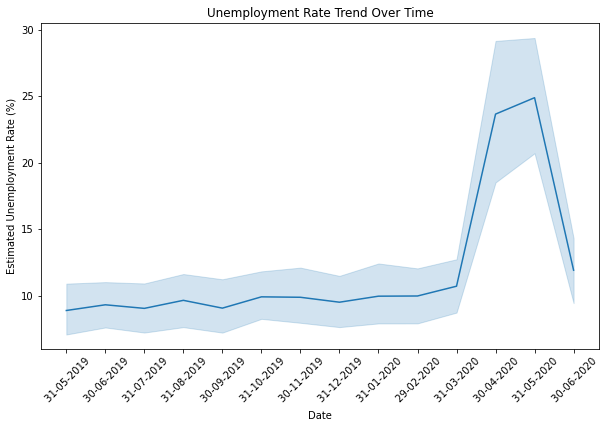

In [21]:
# Unemployment rate trend over time

plt.figure(figsize=(10, 6))
sns.lineplot(x=' Date', y=' Estimated Unemployment Rate (%)', data=df)
plt.title('Unemployment Rate Trend Over Time')
plt.xlabel('Date')
plt.ylabel('Estimated Unemployment Rate (%)')
plt.xticks(rotation=45)
plt.show()


#By seeing plot we can say unemployment rate increased in 3rd month of 2020 and till fifth month it increased more then fell 
#down , it shows that unemployment rate increased during peak corona time


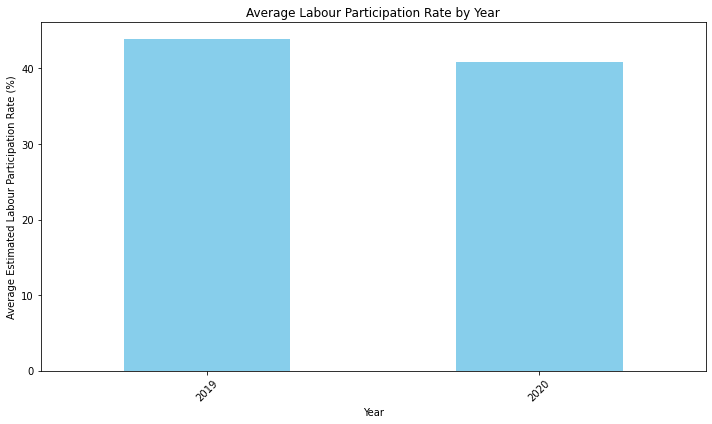

In [28]:
# labour participation rate trend over time


df['Year'] = df['Date'].dt.year

labourrate = df.groupby('Year')[' Estimated Labour Participation Rate (%)'].mean()

plt.figure(figsize=(10, 6))
labourrate.plot(kind='bar', color='skyblue')
plt.title('Average Labour Participation Rate by Year')
plt.xlabel('Year')
plt.ylabel('Average Estimated Labour Participation Rate (%)')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()
 
#labour participation is greater in 2019 than 2020 , it shows that due to covid people couldn't partcipate in labour in 2020 
#although unemployed



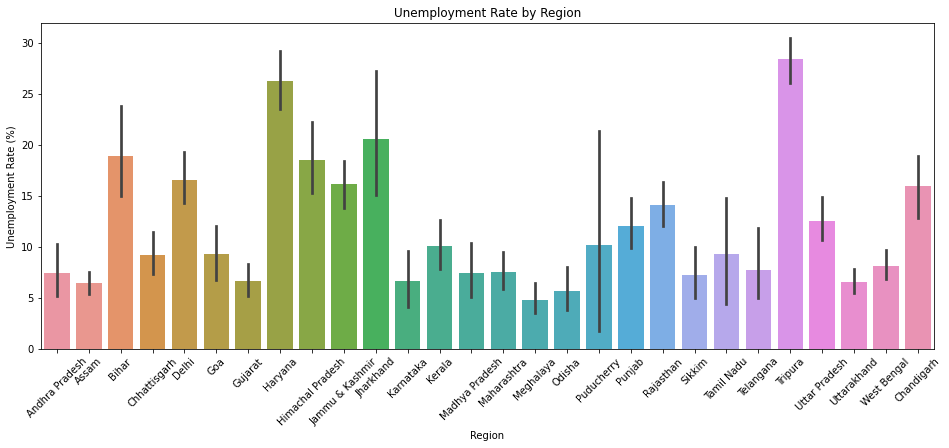

In [33]:
#Analysis regionaly

plt.figure(figsize=(16, 6))
sns.barplot(x='Region', y=' Estimated Unemployment Rate (%)', data=df)
plt.title('Unemployment Rate by Region')
plt.xlabel('Region')
plt.ylabel('Unemployment Rate (%)')
plt.xticks(rotation=45)
plt.show()

#we can  see in which regions has highest rate of unemployement in 2019-20 , indian region tripura has highest rate of
#unemployement.


In [35]:
#Frequency  insights

df[' Frequency'].value_counts()

#we can see data set is inconsistent and not proper insights as frequence column consist of only one value monthly , it should
#contain weekly, yeearly daily values, well now we can say we have all ratios depend on monthly


Monthly     381
 Monthly    359
Name:  Frequency, dtype: int64

In [36]:
#area analysis

df['Area'].value_counts()



Urban    381
Rural    359
Name: Area, dtype: int64

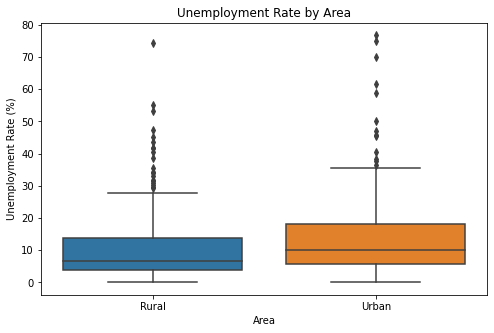

In [38]:

plt.figure(figsize=(8, 5))
sns.boxplot(x='Area', y=' Estimated Unemployment Rate (%)', data=df)
plt.title('Unemployment Rate by Area')
plt.xlabel('Area')
plt.ylabel('Unemployment Rate (%)')
plt.show()

#urban area has little greate unemploement rate 


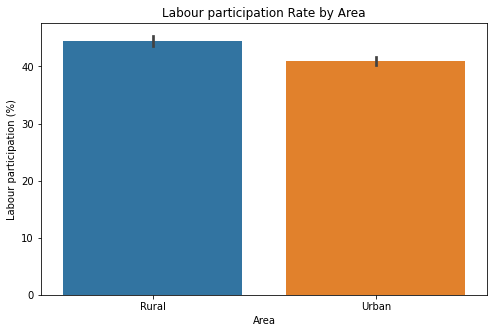

In [56]:

plt.figure(figsize=(8, 5))
sns.barplot(x='Area', y=' Estimated Labour Participation Rate (%)', data=df)
plt.title('Labour participation Rate by Area')
plt.xlabel('Area')
plt.ylabel('Labour participation (%)')
plt.show()

#labour participation is greater in rural area


In [57]:
#data insights can also seen by correlation analysis, so now we will see correlation matrix results of dataset

cor=df.corr()
cor

#1 shows positive correlation(one increases/decreases other also increases/decreases)
#-1 shows negative(one increases other decreases)
#0 shows no correlation

#Estimated Unemployment Rate (%) with Estimated Employed:
# Correlation coefficient: -0.222876
# There is a negative correlation between the estimated unemployment rate and the estimated number of employed 
# This means that as the unemployment rate increases, the estimated number of employed individuals tends to decrease,
# correlation not really strong

# Estimated Unemployment Rate (%) with Estimated Labour Participation Rate (%):
# Correlation coefficient: 0.002558
# There is almost no linear correlation between the estimated unemployment rate and the estimated labour 
# participation rate. The correlation is very close to zero, indicating that changes in one variable are not strongly associated 
# with changes in the other.


# Estimated Unemployment Rate (%) with Year:
# Correlation coefficient: 0.262602
# There is a positive correlation between the estimated unemployment rate and the year. Over 
# the years covered by the dataset, there has been a slight tendency for the unemployment rate to increase.correlation is not 
#very strong.

# Estimated Employed with Estimated Labour Participation Rate (%):
# Correlation coefficient: 0.011300
# There is a very weak positive correlation between the estimated number of employed individuals and the estimated
# labour participation rate. Changes in the number of employed individuals are not strongly associated with changes in the 
#labour participation rate.


# Estimated Employed with Year:
# Correlation coefficient: -0.031841
# There is a very weak negative correlation between the estimated number of employed individuals and the year. 
# There has been a slight tendency for the number of employed individuals to decrease slightly over the years 
# covered by the dataset, but the correlation is very weak.
    
# Estimated Labour Participation Rate (%) with Year:
# Correlation coefficient: -0.182460
# There is a negative correlation between the estimated labour participation rate and the year.Over the years covered by the 
# dataset, there has been a slight tendency for the labour participation rate to decrease. 
# the correlation is not very strong.    
    


,Estimated Unemployment Rate (%),Estimated Employed,Estimated Labour Participation Rate (%),Year
Estimated Unemployment Rate (%),1.000000,-0.222876,0.002558,0.262602
Estimated Employed,-0.222876,1.000000,0.011300,-0.031841
Estimated Labour Participation Rate (%),0.002558,0.011300,1.000000,-0.182460
Year,0.262602,-0.031841,-0.182460,1.000000


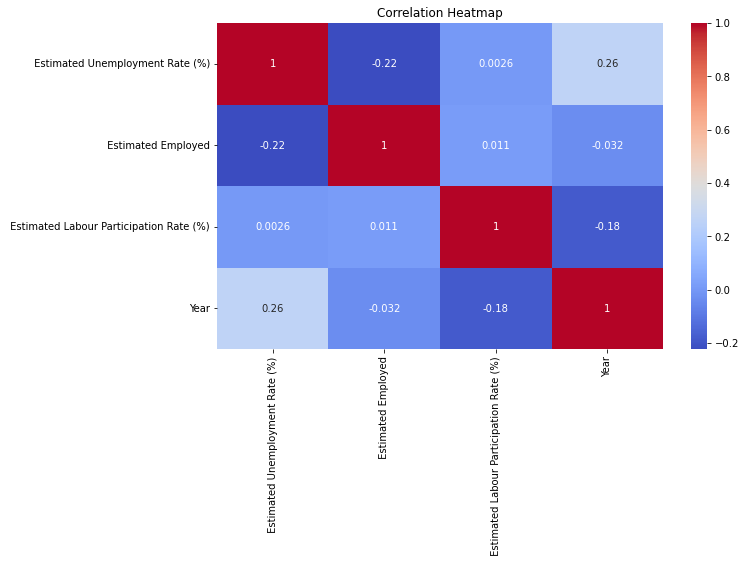

In [58]:
#displaying correlation result by heatmap

plt.figure(figsize=(10, 6))
sns.heatmap(cor, annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()


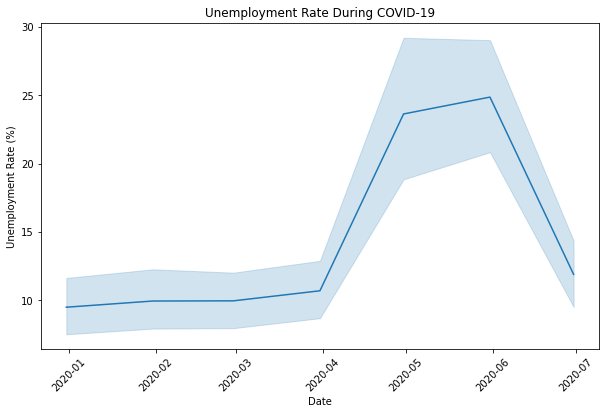

In [47]:
#analysis seeing covid-19 period


covid_start_date = pd.to_datetime('2019-12-31')
covid_end_date = pd.to_datetime('2020-08-29')

df2=df[(df['Date'] >= covid_start_date) & (df['Date'] <= covid_end_date)]

plt.figure(figsize=(10, 6))
sns.lineplot(x='Date', y=' Estimated Unemployment Rate (%)', data=df2)
plt.title('Unemployment Rate During COVID-19')
plt.xlabel('Date')
plt.ylabel('Unemployment Rate (%)')
plt.xticks(rotation=45)
plt.show()

#again it shows same result as i mentioned in above analysi that unemployment increases in 5 and 6 month of 2020 which we can say
#peak covid period


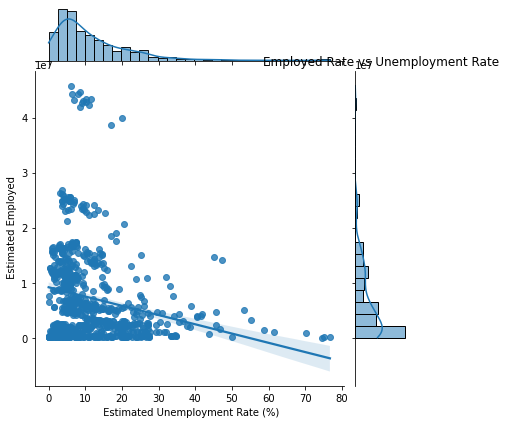

In [54]:


sns.jointplot(x=' Estimated Unemployment Rate (%)', y=' Estimated Employed', data=df, kind='reg')
plt.title('Employed Rate vs Unemployment Rate')
plt.show()

#seeing employement and unemployment in same frame , we can say unemployment increasing within time and employment rate 
#decreases 


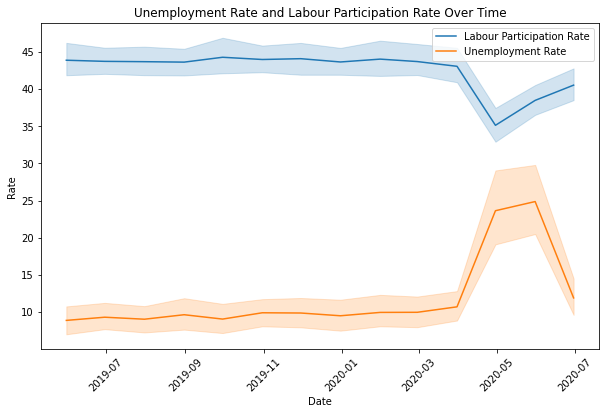

In [51]:
plt.figure(figsize=(10, 6))
sns.lineplot(x='Date', y=' Estimated Labour Participation Rate (%)', data=df, label='Labour Participation Rate')
sns.lineplot(x='Date', y=' Estimated Unemployment Rate (%)', data=df, label='Unemployment Rate')
plt.title('Unemployment Rate and Labour Participation Rate Over Time')
plt.xlabel('Date')
plt.ylabel('Rate')
plt.xticks(rotation=45)
plt.legend()
plt.show()

#so , this analytic graph is tricky , as you can see labour rate start form 43 approx, and unemployment from 0 , unemployment 
#is increased at some point but later controlled but labour rate always on its peak and steal increase, both rates can be 
#influenced by economy, politics and other factors


In [ ]:
#by seeing above exploratory data analysis, i come to the point which says, unemployment and labour is related ,those who
#unemployed mostly participate in labour which we can say is second name of unemployment as person not getting enough according
#to his/her education and requirements
#we can see which area , which region has employement rate and how it's behaviour whether it is getting increasing or decreasing
#or normal , then can perform further analysis by seeing particular region economical and financial situations and can control
#unemployment by controling its increasing factors 
